In [1]:
# read csv file and convert to pandas dataframe

import pandas as pd

def read_csv(file):
    df = pd.read_csv(file)
    return df

data1 = read_csv('merged_df.csv')
data2 = read_csv('merged_df-1.csv')
go_data = read_csv('go_parent_data.csv')


In [20]:
# print data2 dimension 
print(data2.shape)


(83, 196)


In [2]:
# Keywords that are relevant to being a vaccine candidate
keywords = [
    "immune", "antigen", "pathogen", "cytokine", "receptor", "binding", "membrane", "extracellular"
]
# Filter the data based on these keywords
relevant_go_terms = go_data[go_data['name'].str.contains('|'.join(keywords), case=False, na=False)]

In [3]:
# Assuming relevant_go_terms['go_id'] is a list or a pandas Series of GO terms
go_ids = relevant_go_terms['go_id'].tolist()  # Convert to list if it is a Series

# Select columns starting with 'GO:' that are also in go_ids
go_columns = [col for col in data1.columns if col.startswith('GO:') and col in go_ids]

# Filter rows where any of the selected columns contains the value 1
#filtered_data = data1[data1[go_columns].apply(lambda row: (row == 1).any(), axis=1)]

# Filter rows where at least two of the selected columns contain the value 1
filtered_data = data1[data1[go_columns].apply(lambda row: (row == 1).sum() >= 2, axis=1)]

# Display the filtered data
filtered_data

,id,Molecular_Weight,Instability_Index,Isoelectric_Point,GRAVY,Secondary_Structure_Fraction_Helix,Secondary_Structure_Fraction_Turn,Secondary_Structure_Fraction_Sheet,Extinction_Coefficient_1,Extinction_Coefficient_2,...,GO:0098542,GO:0098754,GO:0098772,GO:0140096,GO:0140097,GO:0140098,GO:0140104,GO:0140110,GO:0140657,GO:1901135
6,A0A075PDJ4,8608.3533,19.124706,4.867828,1.302353,0.411765,0.211765,0.388235,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
13,A0A081LHZ1,8524.6766,24.472500,7.856907,-0.208750,0.237500,0.200000,0.350000,1490.0,1490.0,...,0,0,0,0,0,0,0,0,0,0
29,A0A081LLP7,8272.0350,8.924051,4.436875,1.243038,0.405063,0.202532,0.417722,2980.0,2980.0,...,0,0,0,0,0,0,0,0,0,0
36,A0A081LNX9,64373.5614,38.819235,10.033489,-0.202551,0.294218,0.246599,0.267007,73800.0,73800.0,...,0,0,0,1,0,0,0,0,0,1
51,A0A081LRY1,44337.6746,26.614450,7.142467,0.666993,0.381418,0.229829,0.317848,87890.0,87890.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27996,T0QSP9,44356.7626,24.736699,7.956511,0.658924,0.381418,0.227384,0.317848,87890.0,87890.0,...,0,0,0,0,0,0,0,0,0,0
28020,T0QUU8,35605.3034,33.799385,6.190698,-0.112923,0.316923,0.227692,0.270769,69900.0,70275.0,...,0,0,0,0,0,0,0,0,0,0
28034,T0QW29,8506.6382,19.336250,7.856907,-0.185000,0.250000,0.200000,0.350000,1490.0,1490.0,...,0,0,0,0,0,0,0,0,0,0
29349,A0A854BBJ4,62298.8830,43.323885,5.547338,-0.004704,0.292683,0.219512,0.327526,47900.0,48275.0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
#subset data from excluding columns starting with GO:

data3 = filtered_data.loc[:, ~filtered_data.columns.str.startswith('GO:')]

# subset excluding id column
data4 = data3.iloc[:, 1:]
data5 = data2.iloc[:, 1:]

print(data3.shape)

(385, 196)


In [5]:
#print all column names
print(data4.columns)

Index(['Molecular_Weight', 'Instability_Index', 'Isoelectric_Point', 'GRAVY',
       'Secondary_Structure_Fraction_Helix',
       'Secondary_Structure_Fraction_Turn',
       'Secondary_Structure_Fraction_Sheet', 'Extinction_Coefficient_1',
       'Extinction_Coefficient_2', 'A',
       ...
       'CytoplasmicMembrane', 'Periplasmic', 'OuterMembrane', 'Extracellular',
       'prediction__Cytoplasmic', 'prediction__CytoplasmicMembrane',
       'prediction__Extracellular', 'prediction__OuterMembrane',
       'prediction__Periplasmic', 'prediction__Unknown'],
      dtype='object', length=195)


In [37]:
# Create custom index for data2
custom_index = [f'H{i+1}' for i in range(len(data2))]
data5.index = custom_index

# Concatenate data4 and data2
merged_data = pd.concat([data4, data5])

print(merged_data.columns)
print(data4.columns)

# is merged_data a dataframe?
print(type(merged_data))
print(merged_data.shape)


Index(['Molecular_Weight', 'Instability_Index', 'Isoelectric_Point', 'GRAVY',
       'Secondary_Structure_Fraction_Helix',
       'Secondary_Structure_Fraction_Turn',
       'Secondary_Structure_Fraction_Sheet', 'Extinction_Coefficient_1',
       'Extinction_Coefficient_2', 'A',
       ...
       'CytoplasmicMembrane', 'Periplasmic', 'OuterMembrane', 'Extracellular',
       'prediction__Cytoplasmic', 'prediction__CytoplasmicMembrane',
       'prediction__Extracellular', 'prediction__OuterMembrane',
       'prediction__Periplasmic', 'prediction__Unknown'],
      dtype='object', length=195)
Index(['Molecular_Weight', 'Instability_Index', 'Isoelectric_Point', 'GRAVY',
       'Secondary_Structure_Fraction_Helix',
       'Secondary_Structure_Fraction_Turn',
       'Secondary_Structure_Fraction_Sheet', 'Extinction_Coefficient_1',
       'Extinction_Coefficient_2', 'A',
       ...
       'CytoplasmicMembrane', 'Periplasmic', 'OuterMembrane', 'Extracellular',
       'prediction__Cytoplasmic', 

In [33]:
#print column data types
print(merged_data.dtypes)
print(data4.dtypes)

Molecular_Weight                      float64
Instability_Index                     float64
Isoelectric_Point                     float64
GRAVY                                 float64
Secondary_Structure_Fraction_Helix    float64
                                       ...   
prediction__Extracellular               int64
prediction__OuterMembrane               int64
prediction__Periplasmic                 int64
prediction__Unknown                     int64
id                                     object
Length: 196, dtype: object
Molecular_Weight                      float64
Instability_Index                     float64
Isoelectric_Point                     float64
GRAVY                                 float64
Secondary_Structure_Fraction_Helix    float64
                                       ...   
prediction__CytoplasmicMembrane         int64
prediction__Extracellular               int64
prediction__OuterMembrane               int64
prediction__Periplasmic                 int64
predict

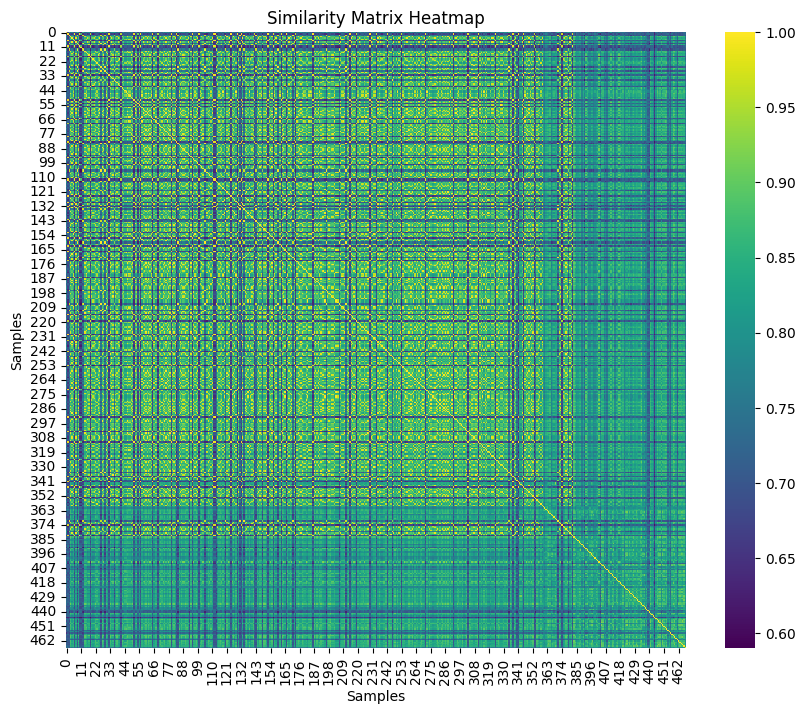

In [38]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
import seaborn as sns
import matplotlib.pyplot as plt

def gower_distance(X):
    individual_variable_distances = []
    
    for col in X.columns:
        if X[col].dtype in ['int64', 'float64']:
            scaler = MinMaxScaler()
            scaled_col = scaler.fit_transform(X[[col]])
            distance = np.abs(scaled_col[:, np.newaxis] - scaled_col[np.newaxis, :])
            individual_variable_distances.append(distance)
        
        elif X[col].dtype == 'object':
            encoder = OneHotEncoder(sparse=False)
            encoded_col = encoder.fit_transform(X[[col]])
            distance = np.not_equal(encoded_col[:, np.newaxis], encoded_col[np.newaxis, :]).astype(float).mean(axis=2)
            individual_variable_distances.append(distance)
    
    # Average distances across all variables
    return np.mean(individual_variable_distances, axis=0)

# Compute Gower distance
gower_dist = gower_distance(merged_data)

# Remove the extra dimension
gower_dist = np.squeeze(gower_dist)

# Convert distance to similarity matrix
similarity_matrix = 1 - gower_dist

# Visualize the similarity matrix
plt.figure(figsize=(10, 8))
sns.heatmap(similarity_matrix, cmap='viridis')
plt.title('Similarity Matrix Heatmap')
plt.xlabel('Samples')
plt.ylabel('Samples')
plt.show()

In [39]:
#write the similarity matrix to a csv file

similarity_matrix_df = pd.DataFrame(similarity_matrix)
similarity_matrix_df.to_csv('similarity_matrix.csv')





In [40]:
# Calculate the threshold using the 75th percentile
threshold = np.percentile(similarity_matrix, 75)
print(f"Threshold: {threshold}")

Threshold: 0.8752025812108872


In [41]:
import networkx as nx

# Initialize the graph
G = nx.Graph()

# Add nodes
num_samples = similarity_matrix.shape[0]
G.add_nodes_from(range(num_samples))

# Add edges based on the threshold
for i in range(num_samples):
    for j in range(i + 1, num_samples):
        if similarity_matrix[i, j] > threshold:
            G.add_edge(i, j, weight=similarity_matrix[i, j])

print(f"Number of nodes: {G.number_of_nodes()}")
print(f"Number of edges: {G.number_of_edges()}")

Number of nodes: 468
Number of edges: 27144


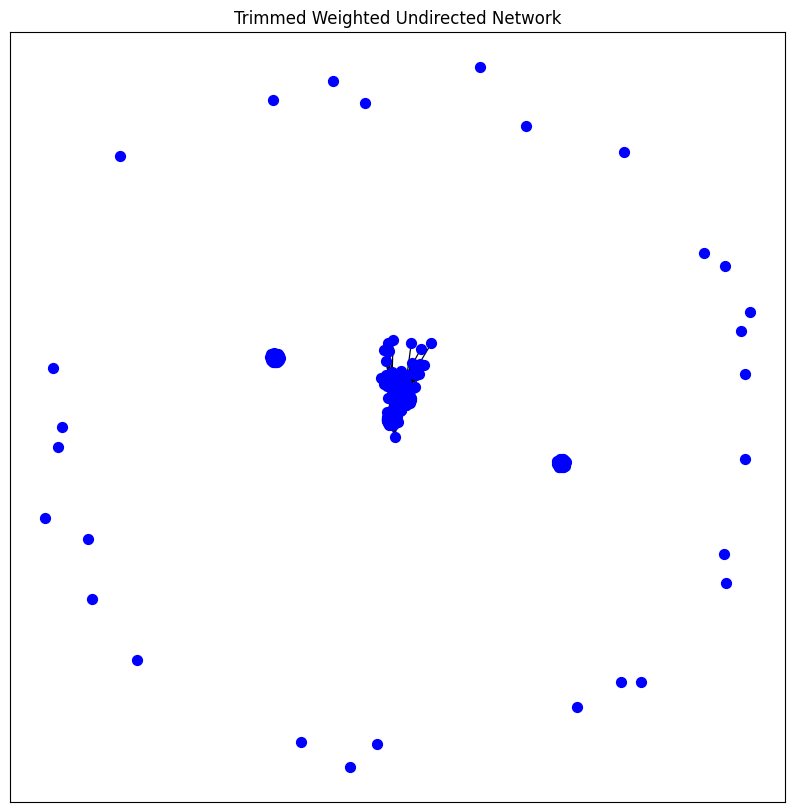

In [42]:
import matplotlib.pyplot as plt

# Draw the network
plt.figure(figsize=(10, 10))
pos = nx.spring_layout(G)  # Layout for visual representation
edges = G.edges(data=True)
weights = [edge[2]['weight'] for edge in edges]

# Draw nodes and edges
nx.draw_networkx_nodes(G, pos, node_size=50, node_color='blue')
nx.draw_networkx_edges(G, pos, edgelist=edges, width=weights)

# Display the network
plt.title('Trimmed Weighted Undirected Network')
plt.show()

In [ ]:
# Identify connected components
connected_components = list(nx.connected_components(G))

# Draw the network with different colors for each connected component
plt.figure(figsize=(10, 10))
pos = nx.spring_layout(G)  # Layout for visual representation

# Assign different colors to each connected component
colors = sns.color_palette("husl", len(connected_components))

for i, component in enumerate(connected_components):
    nx.draw_networkx_nodes(G, pos, nodelist=list(component), node_size=50, node_color=[colors[i]])
    nx.draw_networkx_edges(G, pos, edgelist=[(u, v) for u in component for v in G.neighbors(u) if v in component])

# Display the network
plt.title('Trimmed Weighted Undirected Network with Connected Components')
plt.show()

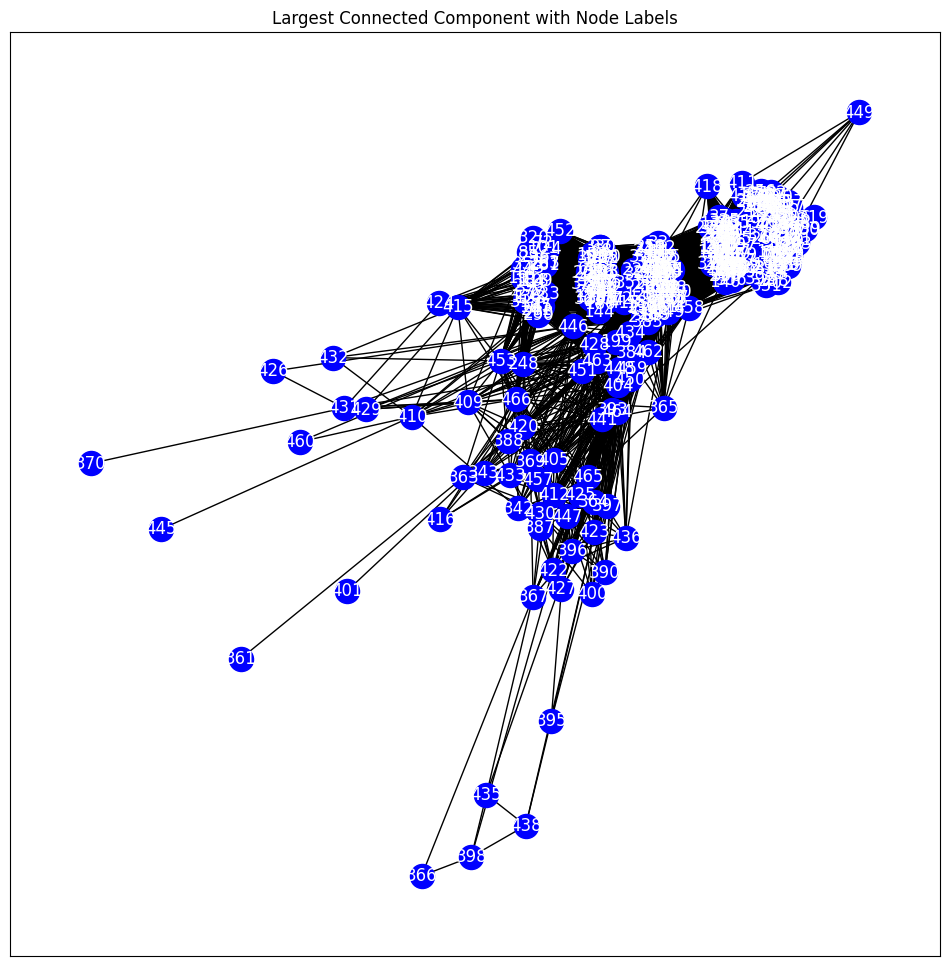

In [45]:
# Identify the largest connected component
largest_cc = max(nx.connected_components(G), key=len)
largest_subgraph = G.subgraph(largest_cc)

# Draw the largest connected component with node labels
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(largest_subgraph)  # Layout for visual representation

# Draw nodes, edges, and labels
nx.draw_networkx_nodes(largest_subgraph, pos, node_size=300, node_color='blue')
nx.draw_networkx_edges(largest_subgraph, pos, edgelist=largest_subgraph.edges(), width=1.0)
nx.draw_networkx_labels(largest_subgraph, pos, font_size=12, font_color='white')

# Display the network
plt.title('Largest Connected Component with Node Labels')
plt.show()

In [56]:
#print node labels of the largest connected component
node_labels = {node: merged_data.iloc[node].name for node in largest_cc}
print(node_labels)
#convert values to string 
node_labels = {k: str(v) for k, v in node_labels.items()}
print(node_labels)
# how many node labels start with 'H'?
count = sum(1 for label in node_labels.values() if label.startswith('H'))
print(count)


{3: 36, 4: 51, 5: 86, 7: 108, 9: 127, 14: 239, 15: 252, 16: 287, 17: 305, 19: 685, 20: 720, 21: 735, 22: 815, 23: 969, 24: 1001, 25: 1027, 27: 1155, 28: 1174, 30: 1285, 31: 1323, 33: 1428, 34: 1452, 35: 1476, 37: 1643, 38: 1644, 39: 1655, 40: 1745, 42: 1792, 43: 1811, 44: 1813, 45: 1899, 46: 1913, 47: 1922, 48: 2083, 49: 2192, 50: 2209, 52: 2291, 53: 2413, 55: 2457, 57: 2775, 58: 2840, 59: 2870, 60: 2878, 61: 2959, 62: 3123, 63: 3129, 64: 3157, 66: 3256, 67: 3281, 68: 3330, 70: 3548, 71: 3554, 72: 3760, 73: 3831, 74: 3833, 75: 3914, 76: 3970, 77: 4056, 78: 4059, 80: 4274, 81: 4275, 82: 4409, 85: 4563, 86: 4625, 87: 4642, 88: 4668, 89: 4780, 90: 4782, 91: 4859, 92: 4911, 94: 5036, 96: 5203, 97: 5208, 98: 5240, 99: 5431, 101: 5502, 102: 5629, 103: 5636, 106: 5848, 107: 5849, 108: 5856, 109: 5969, 110: 6043, 114: 6263, 115: 6292, 116: 6341, 117: 6348, 118: 6448, 119: 6624, 121: 6662, 122: 6680, 123: 6709, 125: 6777, 126: 6795, 127: 6858, 128: 6901, 130: 6984, 133: 7139, 135: 7224, 136: 72

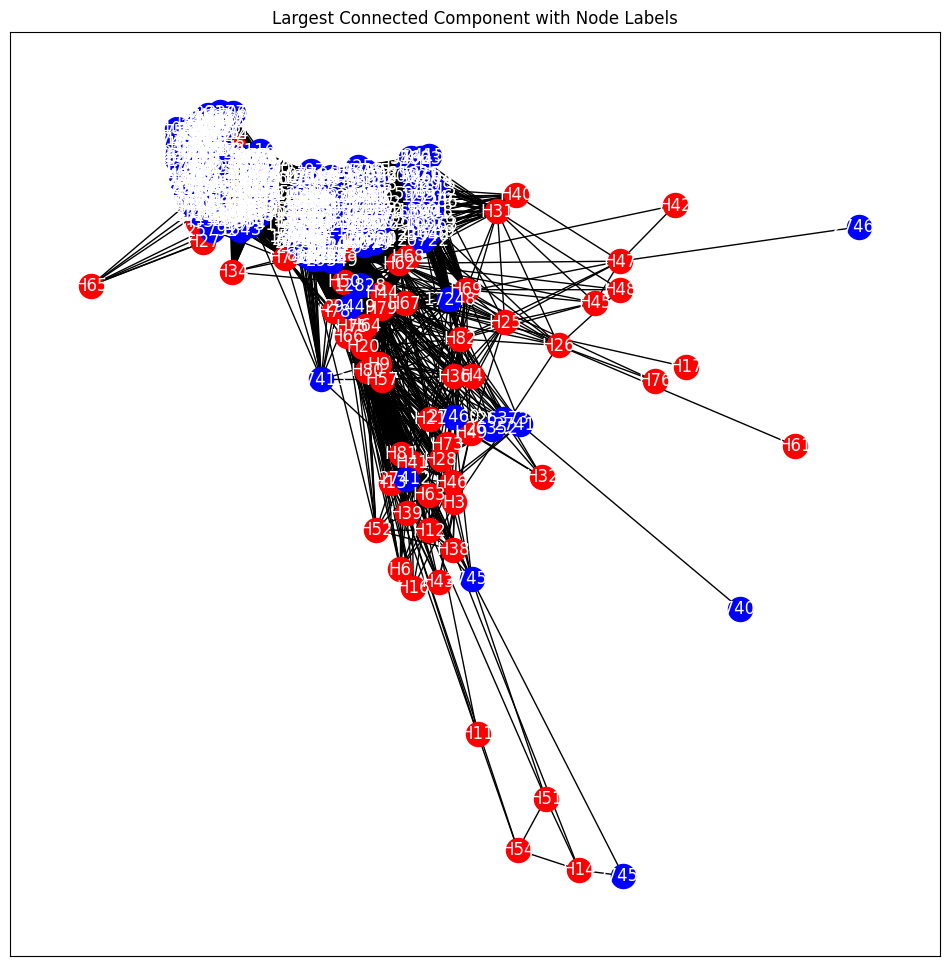

In [54]:
# show node ids of the largest connected component on the network, color the nodes starting with 'H' in red
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(largest_subgraph)  # Layout for visual representation

# Draw nodes, edges, and labels
nx.draw_networkx_nodes(largest_subgraph, pos, nodelist=[node for node in largest_cc if node_labels[node].startswith('H')],
                       node_size=300, node_color='red')
nx.draw_networkx_nodes(largest_subgraph, pos, nodelist=[node for node in largest_cc if not node_labels[node].startswith('H')],
                          node_size=300, node_color='blue')
nx.draw_networkx_edges(largest_subgraph, pos, edgelist=largest_subgraph.edges(), width=1.0)
nx.draw_networkx_labels(largest_subgraph, pos, labels=node_labels, font_size=12, font_color='white')

# Display the network
plt.title('Largest Connected Component with Node Labels')
plt.show()


In [61]:
# Create node color attribute
for node in largest_subgraph.nodes():
    if node_labels[node].startswith('H'):
        largest_subgraph.nodes[node]['color'] = 'red'
    else:
        largest_subgraph.nodes[node]['color'] = 'blue'


In [62]:
# export this network to gephi 
nx.write_gexf(largest_subgraph, 'largest_connected_component.gexf')
